#### Add primary imports

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from scipy.cluster import hierarchy 
from sklearn.datasets import make_blobs 
import pandas as pd
from scipy import ndimage 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
import pylab

#### Read from CSV File

In [2]:
df = pd.read_csv("Clustering-Dataset.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#### Pre-processing

In [3]:
df = df.dropna()
df = df.reset_index(drop=True)
df['Gender'].replace({ 'Female' : 0 , 'Male' : 1 } ,inplace=True)
df = df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Spending-Score"})
print(df.dtypes)
df 


CustomerID        int64
Gender            int64
Age               int64
Income            int64
Spending-Score    int64
dtype: object


,CustomerID,Gender,Age,Income,Spending-Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


#### Data analysis

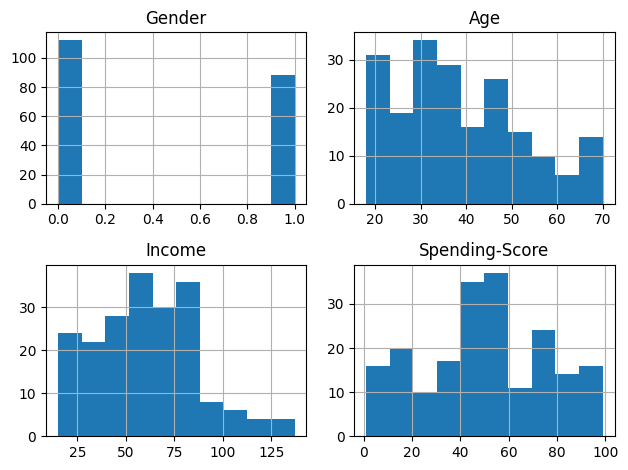

In [4]:
df.loc[:, df.columns != 'CustomerID'].hist()
plt.tight_layout()
plt.show()

#### <span style="color: red;"> Normalizing over the standard deviation and Min Max deviation
##### Standard Scaler :

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = df.values[:,1:]
X_std = np.nan_to_num(X_std)
feature_std = StandardScaler().fit_transform(X_std)
feature_std[:5]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992]])

##### Min Max Scaler :

In [6]:
from sklearn.preprocessing import MinMaxScaler
X_mm = df.values[:,1:]                  #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mm = min_max_scaler.fit_transform(X_mm)
feature_mm[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

#### <span style="color: red;"> Modeling with K-Means Clustering

In [7]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)

# Std Normalization
k_means.fit(feature_std[:,1:])
labels_KMeans_std = k_means.labels_
print(labels_KMeans_std)  

# minmax normalization
k_means.fit(feature_mm[:,1:])
labels_KMeans_mm = k_means.labels_
print(labels_KMeans_mm)

[2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 0
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 0 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 0 2 2 2 0 0 0 0 2 0 1 1 2 1 0 1 0 1 0 1 2 1 2 1 0 1 2 1 0 1 2 1 2 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1]
[1 1 2 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 2 1 1 1 0 0 0 0 1 2 1 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


#### Assign the labels to each row in dataframe


In [8]:
ndf = df.copy()
ndf["Label-KMeans-std"] = labels_KMeans_std
ndf["Label-KMeans-mm"] = labels_KMeans_mm
ndf

,CustomerID,Gender,Age,Income,Spending-Score,Label-KMeans-std,Label-KMeans-mm
0,1,1,19,15,39,2,1
1,2,1,21,15,81,2,1
2,3,0,20,16,6,2,2
3,4,0,23,16,77,2,1
4,5,0,31,17,40,2,1
...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,1
196,197,0,45,126,28,0,2
197,198,1,32,126,74,1,1
198,199,1,32,137,18,1,2


In [9]:
ndf.groupby('Label-KMeans-std').mean()

,CustomerID,Gender,Age,Income,Spending-Score,Label-KMeans-mm
Label-KMeans-std,,,,,,
0,102.648352,0.450549,51.274725,61.802198,34.208791,0.659341
1,161.951220,0.463415,32.853659,87.341463,79.975610,1.024390
2,60.573529,0.411765,25.838235,42.750000,53.647059,1.029412


In [10]:
ndf.groupby('Label-KMeans-mm').mean()

,CustomerID,Gender,Age,Income,Spending-Score,Label-KMeans-std
Label-KMeans-mm,,,,,,
0,67.910448,0.432836,53.417910,46.955224,39.820896,0.179104
1,100.489362,0.425532,28.457447,60.244681,70.446809,1.574468
2,156.512821,0.487179,38.871795,84.692308,19.230769,0.435897


I try Modeling with Gender and without it. when Gender is in machine directly grouped data 
by Gender and It reduced the effect of other components. Groping when use Gender in modeling:

|  Label-KMeans	 |  CustomerID | Gender |  Age | Income |  Spending-Score |
|---|---|---|---|---|---|
| 0  | 104.364706  | 0.458824  |  28.047059 |61.788235  |  72.882353 |
| 1  | 92.560606   | 0.000000  |  45.075758 |57.727273  |  36.181818 |
| 2  | 104.489796  | 1.000000  |  49.204082 |62.244898  |  29.734694 |

as you see label 1 and 2 directly related to Gender.
so i remove this colum for modeling to remove its influence. 

#### Sort labels by their count


In [11]:
# get the value counts and rank the labels based on their count
counts = ndf['Label-KMeans-std'].value_counts().sort_values(ascending=False)
label_ranks = {label: rank for rank, label in enumerate(counts.index)}
ndf['Label-KMeans-std'] = ndf['Label-KMeans-std'].map(label_ranks)

counts = ndf['Label-KMeans-mm'].value_counts().sort_values(ascending=False)
label_ranks = {label: rank for rank, label in enumerate(counts.index)}
ndf['Label-KMeans-mm'] = ndf['Label-KMeans-mm'].map(label_ranks)


#### histograms

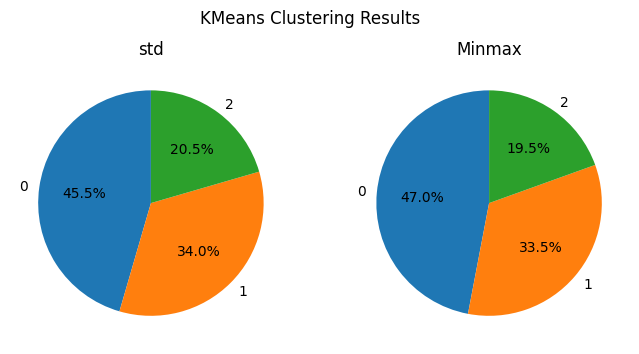

In [12]:
# get the value counts for each label column
counts_KMeans_std = ndf['Label-KMeans-std'].value_counts()
counts_KMeans_mm = ndf['Label-KMeans-mm'].value_counts()

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# plot the first pie chart on the first subplot
ax1.pie(counts_KMeans_std, labels=counts_KMeans_std.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('std')

# plot the second pie chart on the second subplot
ax2.pie(counts_KMeans_mm, labels=counts_KMeans_mm.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Minmax')

# add a common title for both subplots
fig.suptitle('KMeans Clustering Results')

plt.show()


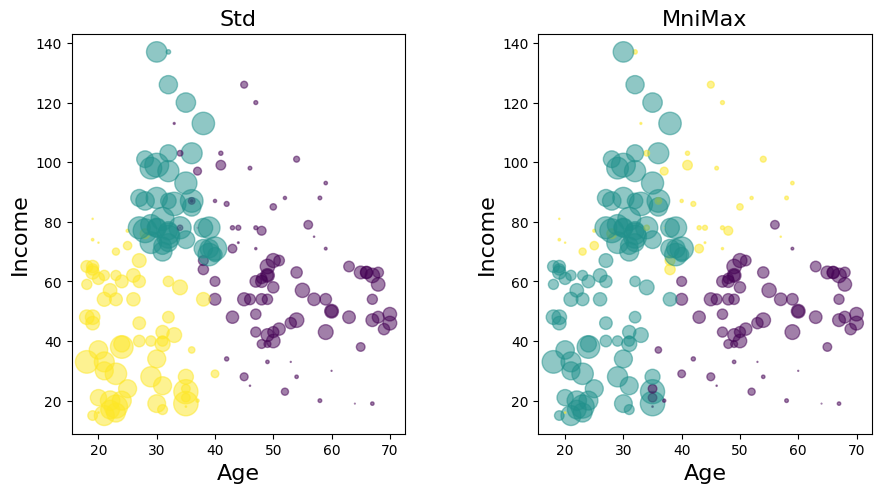

In [13]:
XX = ndf.values

# create a figure with larger size
fig = plt.figure(figsize=(10, 5))

# create scatter plot 1
area1 = np.pi * ( XX[:, 4])**2  
plt.subplot(1, 2, 1)
plt.scatter(XX[:, 2], XX[:, 3], s=area1/100, c=labels_KMeans_std.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title('Std' , fontsize=16)

# create scatter plot 2
area2 = np.pi * ( XX[:, 4])**2  
plt.subplot(1, 2, 2)
plt.scatter(XX[:, 2], XX[:, 3], s=area2/100, c=labels_KMeans_mm.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title('MniMax' , fontsize=16)

# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# display the plot
plt.show()


#### <span style="color: red;"> Modeling with Hierarchical Clustering

##### Euclidean distance calculation :

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

# modeling with std normalization 
dist_matrix_std = euclidean_distances(feature_std[:,1:] , feature_std[:,1:] ) 

# modeling with minmax normalization 
dist_matrix_mm = euclidean_distances(feature_mm[:,1:] , feature_mm[:,1:] ) 


In [15]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix_std, 'complete')
Z_using_dist_matrix = hierarchy.linkage(dist_matrix_mm, 'complete')

##### Draw dendrogram :

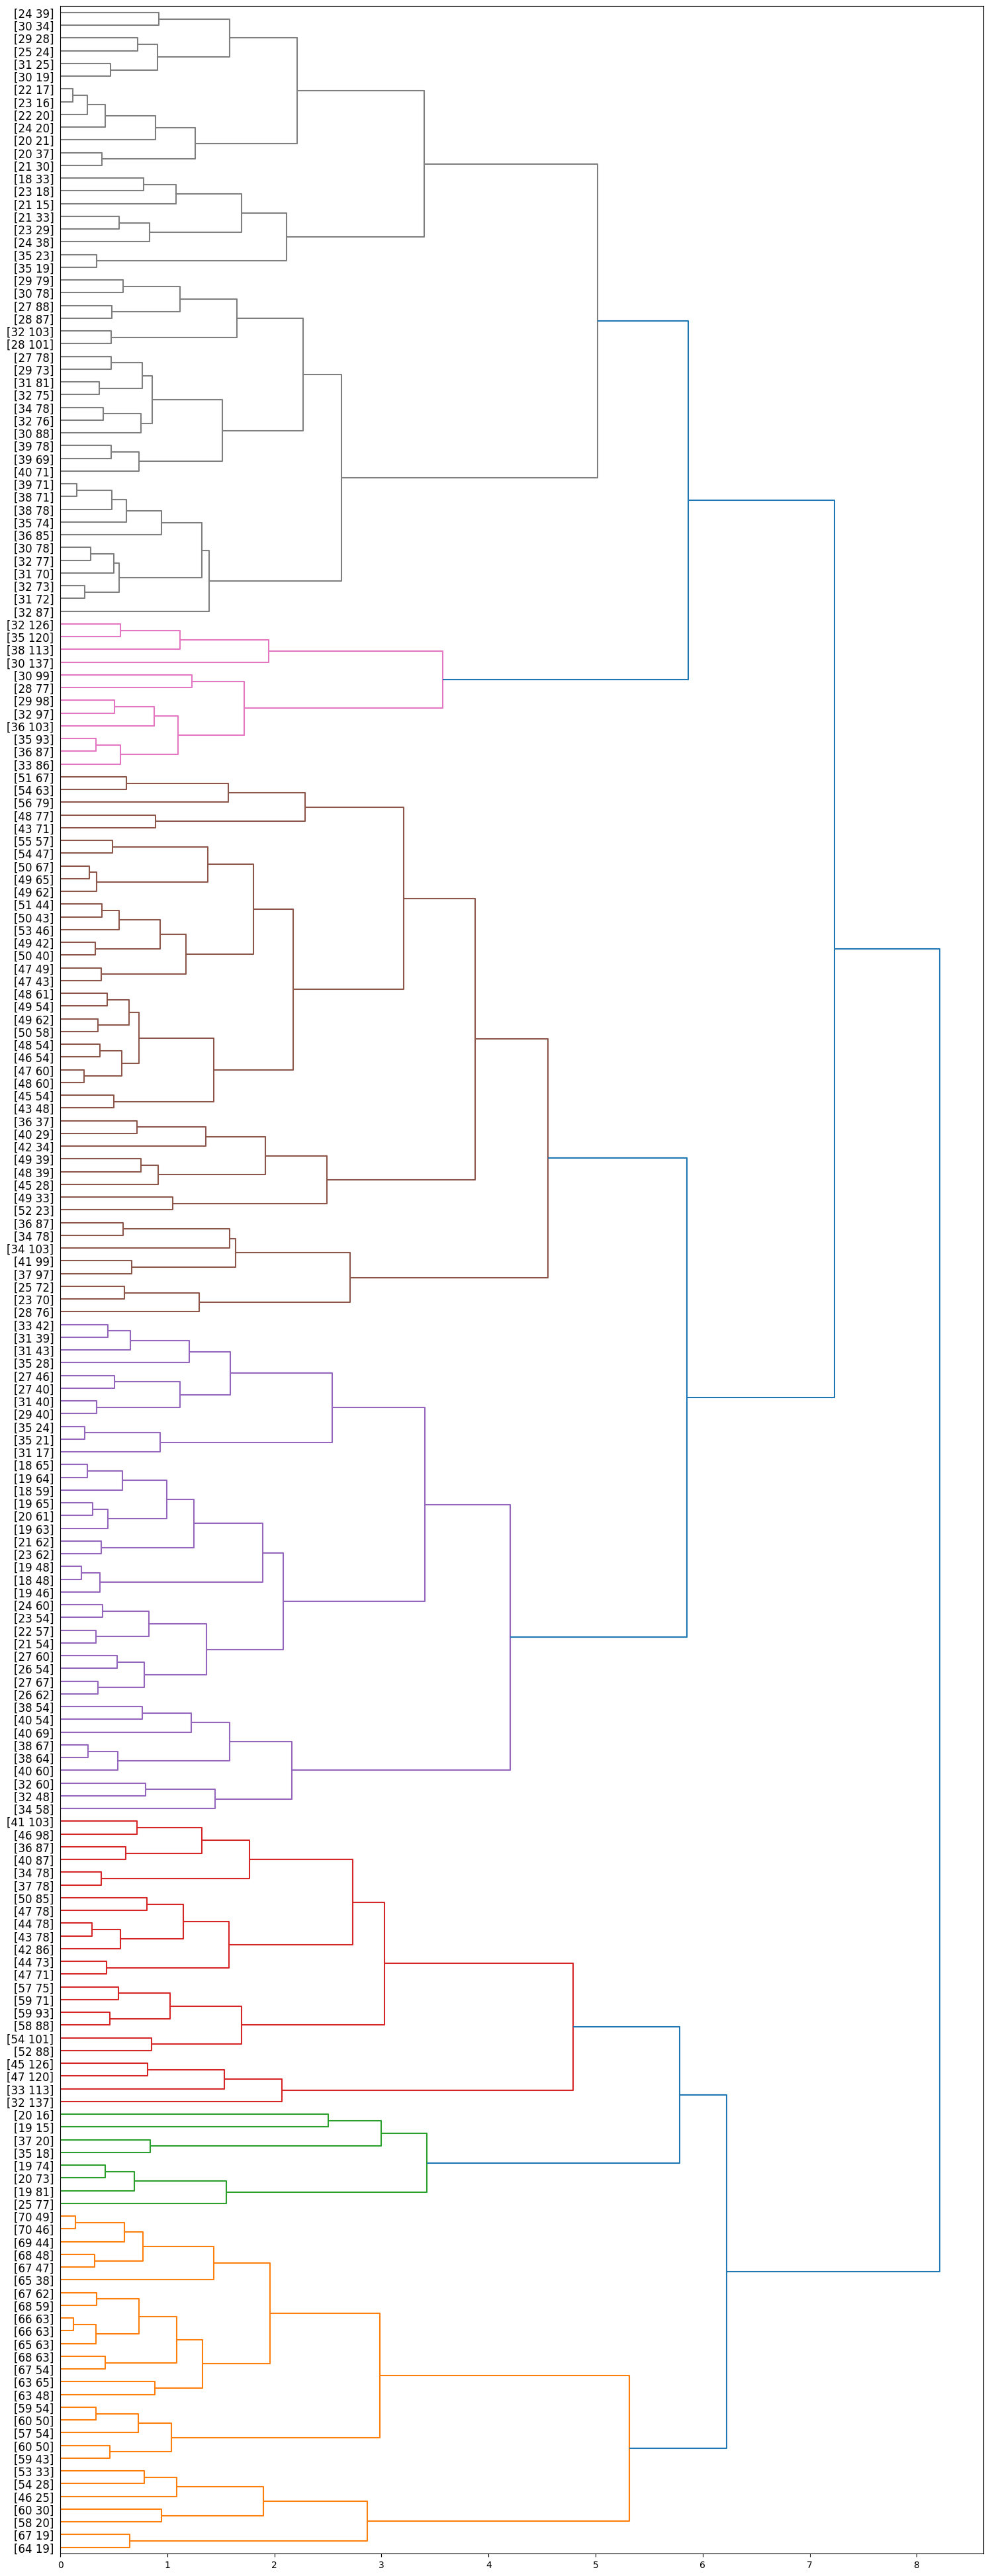

In [16]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (df['Age'][id], df['Income'][id]) 
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

##### labeling:

In [17]:
agglom = AgglomerativeClustering(n_clusters = 3 , linkage = 'complete')
agglom.fit(dist_matrix_std)
label_Hier_std = agglom.labels_

agglom.fit(dist_matrix_mm)
label_Hier_mm = agglom.labels_

In [18]:
ndf['Label-Hier-std'] = label_Hier_std
ndf['Label-Hier-mm' ] = label_Hier_mm
ndf

,CustomerID,Gender,Age,Income,Spending-Score,Label-KMeans-std,Label-KMeans-mm,Label-Hier-std,Label-Hier-mm
0,1,1,19,15,39,1,0,0,0
1,2,1,21,15,81,1,0,0,1
2,3,0,20,16,6,1,2,0,0
3,4,0,23,16,77,1,0,0,1
4,5,0,31,17,40,1,0,0,2
...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,2,0,1,1
196,197,0,45,126,28,0,2,1,0
197,198,1,32,126,74,2,0,1,1
198,199,1,32,137,18,2,2,1,0


In [19]:
ndf.groupby('Label-Hier-std').mean()

,CustomerID,Gender,Age,Income,Spending-Score,Label-KMeans-std,Label-KMeans-mm,Label-Hier-mm
Label-Hier-std,,,,,,,,
0,99.367568,0.432432,38.248649,59.167568,51.805405,0.756757,0.702703,1.189189
1,196.500000,0.500000,36.500000,124.000000,49.625000,1.250000,1.000000,0.500000
2,20.714286,0.571429,57.428571,24.857143,8.428571,0.000000,1.000000,0.000000


In [20]:
ndf.groupby('Label-Hier-mm').mean()

,CustomerID,Gender,Age,Income,Spending-Score,Label-KMeans-std,Label-KMeans-mm,Label-Hier-std
Label-Hier-mm,,,,,,,,
0,107.431034,0.620690,50.689655,63.844828,25.448276,0.172414,1.448276,0.310345
1,113.300000,0.433333,29.933333,65.216667,81.466667,1.650000,0.000000,0.066667
2,86.231707,0.317073,37.000000,54.829268,44.829268,0.500000,0.743902,0.000000


##### Sort labels by their count

In [21]:
# get the value counts and rank the labels based on their count
counts = ndf['Label-Hier-std'].value_counts().sort_values(ascending=False)
label_ranks = {label: rank for rank, label in enumerate(counts.index)}
ndf['Label-Hier-std'] = ndf['Label-Hier-std'].map(label_ranks)

counts = ndf['Label-Hier-mm'].value_counts().sort_values(ascending=False)
label_ranks = {label: rank for rank, label in enumerate(counts.index)}
ndf['Label-Hier-mm'] = ndf['Label-Hier-mm'].map(label_ranks)


##### histograms:

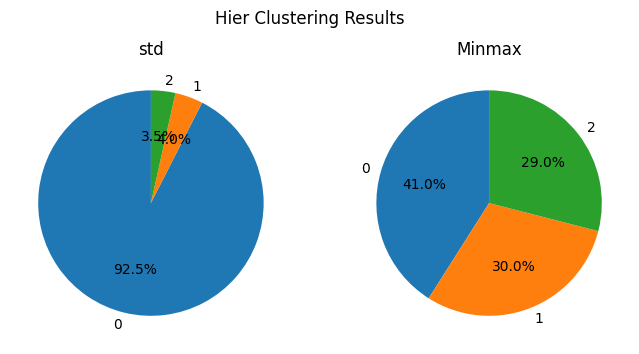

In [22]:
# get the value counts for each label column
counts_Hier_std = ndf['Label-Hier-std'].value_counts()
counts_Hier_mm = ndf['Label-Hier-mm'].value_counts()

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# plot the first pie chart on the first subplot
ax1.pie(counts_Hier_std, labels=counts_Hier_std.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('std')

# plot the second pie chart on the second subplot
ax2.pie(counts_Hier_mm, labels=counts_Hier_mm.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Minmax')

# add a common title for both subplots
fig.suptitle('Hier Clustering Results')

plt.show()


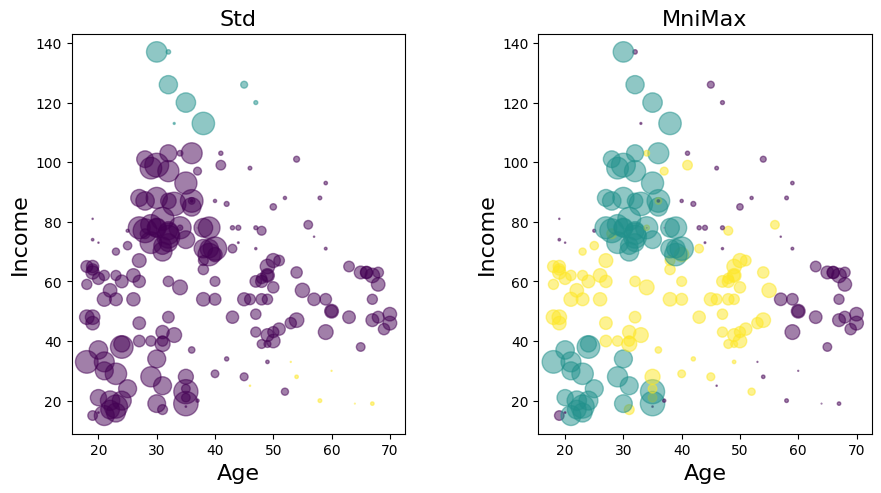

In [25]:
XX = ndf.values

# create a figure with larger size
fig = plt.figure(figsize=(10, 5))

# create scatter plot 1
area1 = np.pi * ( XX[:, 4])**2  
plt.subplot(1, 2, 1)
plt.scatter(XX[:, 2], XX[:, 3], s=area1/100, c=label_Hier_std.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title('Std' , fontsize=16)

# create scatter plot 2
area2 = np.pi * ( XX[:, 4])**2  
plt.subplot(1, 2, 2)
plt.scatter(XX[:, 2], XX[:, 3], s=area2/100, c=label_Hier_mm.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title('MniMax' , fontsize=16)

# adjust the space between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4)

# display the plot
plt.show()
